In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

In [2]:
obraz=mpimg.imread('C:/Users/ajankows/Desktop/python/obrazki_dane/8.png')

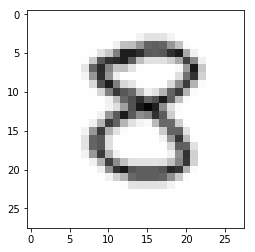

In [3]:
imgplot = plt.imshow(obraz)

In [4]:
obraz.shape

(28, 28, 3)

In [6]:
img_gray = np.zeros((28, 28))
for i in range(28):
    for j in range(28):
        img_gray[i, j] = obraz[i, j, 0] + obraz[i, j, 1] + obraz[i, j, 2]

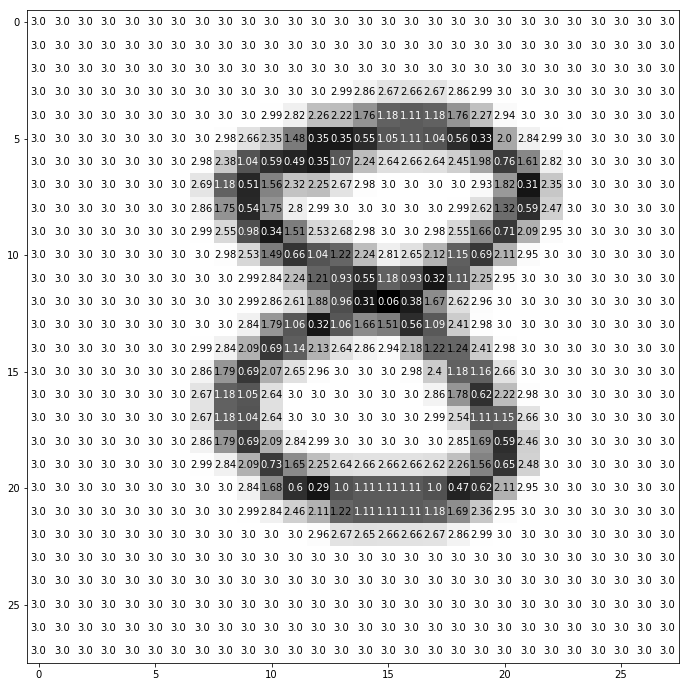

In [7]:
def visualize_input(img, ax):

    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(img_gray, ax)

In [8]:
img_gray.shape

(28, 28)

In [9]:
type(img_gray)

numpy.ndarray

In [10]:
test = np.ones((3, 3))
# przygotowujemy padding z zerami wkolo naszego obrazka

def prepare_padding(image, padding):
    x, y = image.shape[0] + padding, image.shape[1] + padding
    array_to_add = np.zeros((x, y))
    return array_to_add

def prepare_img(image, padding=2):
    pad = prepare_padding(image, padding)
    for i in range(1, image.shape[0]+1):
        for j in range(1, image.shape[1]+1):
            pad[i][j] = image[i-1][j-1]
    return pad

prepare_img(test)   

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  0.],
       [ 0.,  1.,  1.,  1.,  0.],
       [ 0.,  1.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [11]:
test.shape

(3, 3)

In [45]:
### kernel_1 = np.array([[-1, 3, -1], [-1, 3, -1], [-1, 3, -1]])
kernel_2 = np.array([[-1, 0, -1], [-1, 0, -1], [-1, 0, -1]])
kernel_3 = np.array([[-10, 0, 10], [-10, 0, 10], [-10, 0, 10]])
kernel_4 = np.array([[-10, -10, -10], [0, 0, 0], [10, 10, 10]])
kernel_5 = np.array([[-10, -10, -10], [20, 20, 20], [-10, -10, -10]])
kernel_6 = np.array([[0, 0, 20, 0, 0], [0,0, 20,0, 0], [0,0, 20,0, 0], [0,0, 20,0, 0], [0,0, 20,0, 0]])


def convolution(image, kernel, padding=2):
    print(kernel)
    img = prepare_img(image, padding)
    output = np.zeros(img.shape)
    for i in range(padding//2, img.shape[0]-padding//2):
        for j in range(padding//2, img.shape[1]-padding//2):
            #print(i, j, i-1, i+1 , j-1, j+1)
            #print(i, j, (
            #print((img[i-1:i+2,j-1:j+2]))
            
            output[i,j] = (kernel*img[i-padding//2:i+padding ,j-padding//2:j+padding]).sum()
        
    return output[(padding//2):img.shape[0]-(padding//2), (padding//2):img.shape[1]-(padding//2)] #zakres to padding//2 
                                                                                                #2 jesli padding to 2 i paadding-1 w innym wypadku 
def feature_extractor(image, kernel, treshold, padding=2,):
    old = convolution(image, kernel, padding)
#         new = np.zeros((old.shape))

#         for i in range(0, old.shape[0]):
#             for i in range(0, old.shape[1]):
#                 if old[i][j] > treshold: 
#                     #print(old[i][j])
#                     new[i][j] = 255
            
    return old
        
    
new_img = convolution(img_gray, kernel_3, 2)
new_img.shape

[[-10   0  10]
 [-10   0  10]
 [-10   0  10]]


(28, 28)

[[-10   0  10]
 [-10   0  10]
 [-10   0  10]]
[[-10 -10 -10]
 [  0   0   0]
 [ 10  10  10]]


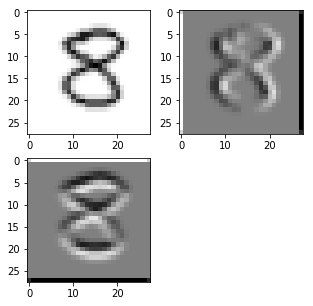

In [46]:
f_img = feature_extractor(image=img_gray, kernel=kernel_3, treshold=-1000)
c_img = feature_extractor(image=img_gray, kernel=kernel_4, treshold=-150)

plt.figure(figsize=[5,5])

# # oryginalny obrazek
plt.subplot(221)
plt.imshow(img_gray, cmap='gray')

# przefiltrowany obrazek
plt.subplot(222)
plt.imshow(f_img, cmap='gray')

# przefiltrowany obrazek
plt.subplot(223)
plt.imshow(c_img, cmap='gray')

In [204]:
print(feature_extractor(img_gray, kernel_3, 180))

[[20  0  0]
 [ 0 20  0]
 [ 0  0 20]]
[[120.         120.         120.         120.         120.
  120.         120.         120.         120.         120.
  120.         120.         120.         120.         120.
  120.         120.         120.         120.         120.
  120.         120.         120.         120.         120.
  120.         120.           0.        ]
 [120.         180.         180.         180.         180.
  180.         180.         180.         180.         180.
  180.         180.         180.         180.         180.
  180.         180.         180.         180.         180.
  180.         180.         180.         180.         180.
  180.         180.           0.        ]
 [120.         180.         180.         180.         180.
  180.         180.         180.         180.         180.
  180.         180.         179.7647047  177.17647076 173.4117651
  173.1764698  173.4117651  177.17647076 179.7647047  180.
  180.         180.         180.         180. 

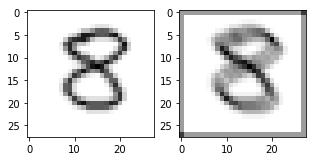

In [176]:
plt.figure(figsize=[5,5])

# oryginalny obrazek
plt.subplot(121)
plt.imshow(img_gray, cmap='gray')

# przefiltrowany obrazek
plt.subplot(122)
plt.imshow(new_img, cmap='gray')

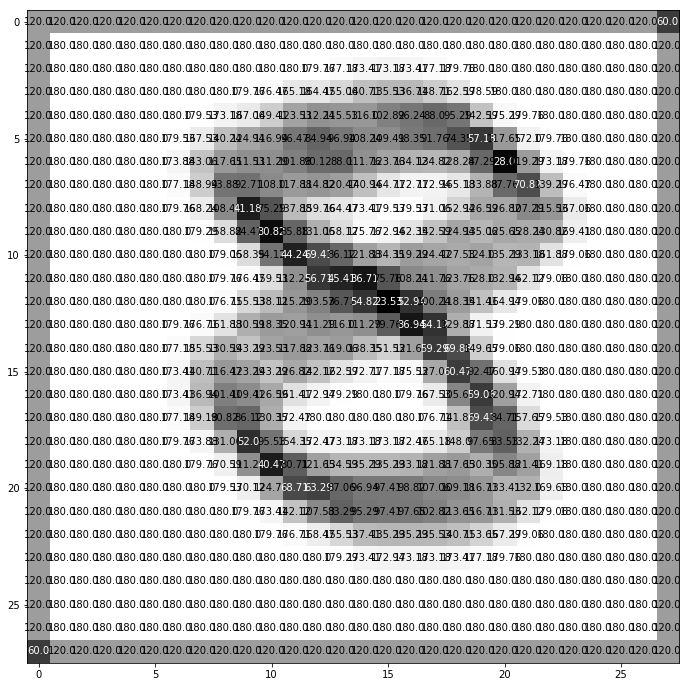

In [77]:
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(new_img, ax)